# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
<img src="XNote_201901081613670.jpg" width=200 height=200 />

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).


# Goals of the Case Study
## There are quite a few goals for this case study.

1. *Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.*
2. *There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.*

# Results Expected
1. A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
2. The word document filled with solutions to all the problems.
3. The overall approach of the analysis in a presentation
    1. Mention the problem statement and the analysis approach briefly 
    2. Explain the results in business terms
    3. Include visualisations and summarise the most important results in the presentation
4. A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 

#### You need to submit the following four components:

* Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
* Word File: Answer all the questions asked by the company in the word document provided.
* Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
* PDF File: Write the summary report in a word file and submit it as a PDF.

# 1. Data Reading and Understanding

1. importing neccessary libraries
2. reading the dataset provided
3. checking basic, statistical and value count info of all the columns to find various insights

In [1]:
# importing required libraries for Data reading and understanding purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# reading the csv file
leads = pd.read_csv('Leads.csv')

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking shape of the data set
leads.shape

(9240, 37)

In [5]:
# checking all the info of the data set like column data types, total entries
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- there 9240 rows and 37 columns
- from the above the information we can see that there are 7 numerical variables and rest 30 are categorical variables 

In [6]:
# checking all the statistical information of numerical variables
leads.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
97%,657466.940000,1.000000,11.000000,1660.000000,7.000000,17.000000,20.000000


from above statistical info, we can see that there are outlier present mostly in 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' 

### Exploratory Data Analysis

Let us try and understand the data now based on each columns effect on the conversion rates

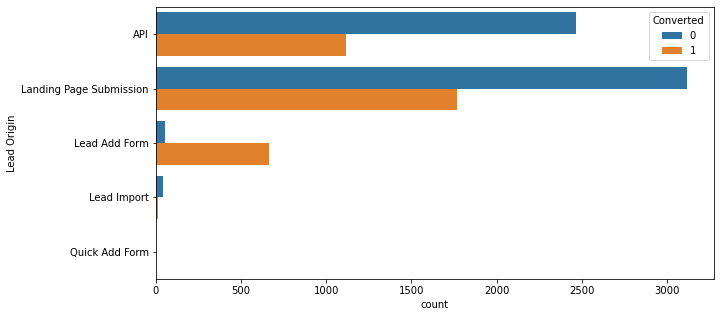

In [7]:
#Understanding Lead Conversion and Lead Origin
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Origin", hue="Converted", data=leads)
plt.show()

From Lead Origin finding, maximum lead conversion happened from Landing Page Submission.

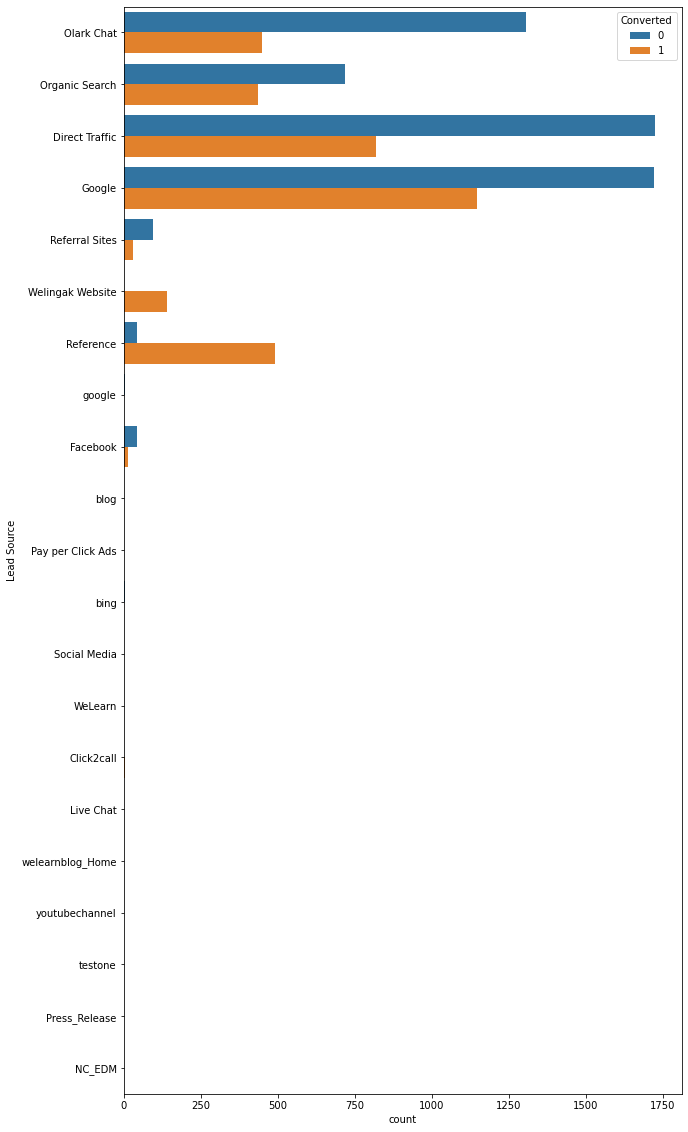

In [8]:
#Understanding Lead Conversion and Lead Source
plt.figure(figsize=(10, 20))
sns.countplot(y="Lead Source", hue="Converted", data=leads)
plt.show()

From the above graph, major lead conversion in the lead source is from 'Google'

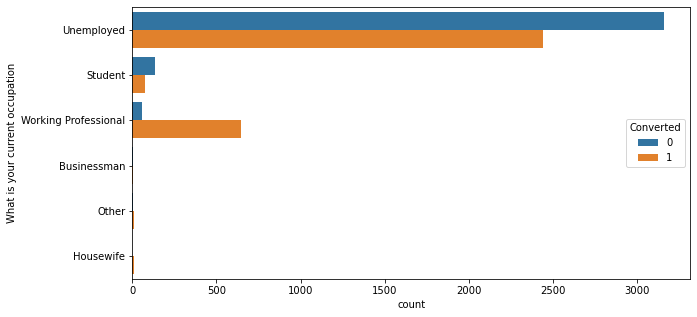

In [9]:
#Understanding Lead Conversion and Current Occupation 
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=leads)
plt.show()

From the above graph, major lead conversion is from the Unemployed Group

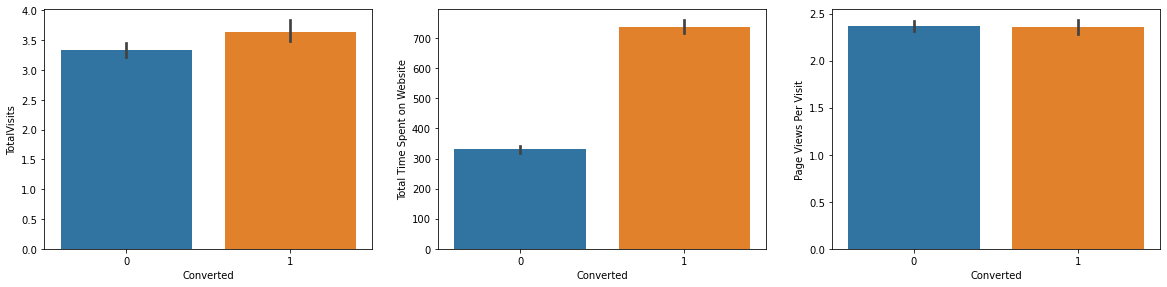

In [10]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = leads)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = leads)

plt.show()

From the above graph, we have mojor lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit

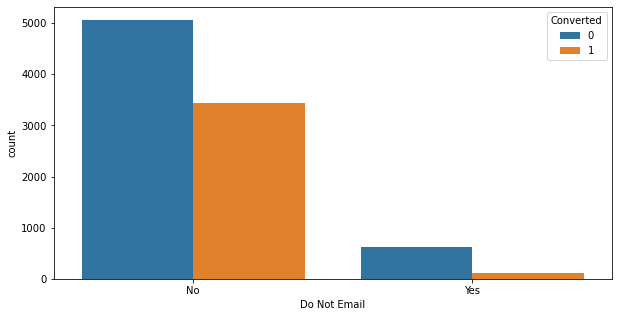

In [11]:
#Understanding Lead Conversion and Do Not Email 
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Email", hue="Converted", data=leads)
plt.show()


Based on the above graph, major lead conversion has happend from the emails that have been sent

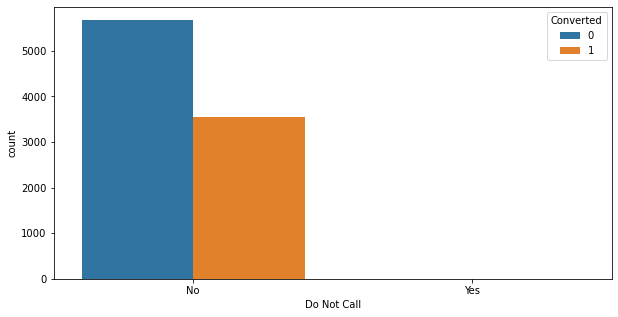

In [12]:
#Understanding Lead Conversion and Do Not Call
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Call", hue="Converted", data=leads)
plt.show()

#### Observations from EDA Process - 
- Maximum lead conversion happened from Landing Page Submission.
- Major lead conversion in the lead source is from 'Google'
- Major lead conversion is from the Unemployed Group
- Major lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit
- Major conversion has happened from the emails that have been sent

In [13]:
# checking the value counts of each variables to find insights

for i in leads.columns:
    print(leads[i].value_counts())
    print('---------------------------------------')

d2d89821-2b35-4802-aa76-a9849d670ad5    1
5ae2b74d-97ea-4e12-ac87-d97754a56151    1
3b04cd8a-a996-4bf2-874b-1183770af66b    1
8e00d156-a96e-4861-aa15-ed6b248e8235    1
6b03876c-bed0-43ca-b3f7-d19ef4386827    1
                                       ..
35326041-8216-485c-b442-e4b849dd19fa    1
ade1fc3a-78b1-4a09-b0f2-1d491ecdcd78    1
73413bd6-e089-4b8f-9359-ad5825101790    1
ccf1d6b3-6893-41bd-89e6-df4102f39895    1
01975c4a-7426-4e89-9a23-3d4006f15f02    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------------------
Go

**from the above the information we will make respective insights**
- we will be removing these variables
    - Prospect ID - not required
    - Lead Number - not required
    - Country- not required 
    - Receive More Updates About Our Courses- column only has 'No' doesn't makes sense to keep it.
    - Update me on Supply Chain Content - column only has 'No' doesn't makes sense to keep it
    - Get updates on DM Content - column only has 'No' doesn't makes sense to keep it
    - I agree to pay the amount through cheque -column only has 'No' doesn't makes sense to keep it
    - Magazine - column only has 'No' doesn't makes sense to keep it

- We will transform below columns of yes/no category to 1/0:
    - Do Not Email
    - Do Not Call
    - Search
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations 
    - a free copy of Mastering The Interview

-------
# 2. Data Cleaning

1. Cleaning the dataset by removing the redundant variables/features.
2. After removing the redundant columns, we found that some columns are having label as ‘Select’ which means customer chose to not answer this question. Thus we would label null value to 'select' label.
3. Remove columns having more than 40% null values
4. Imputing missing values as per column data available

In [14]:
#dropping redundant columns from above insights

leads = leads.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [15]:
leads.shape

(9240, 28)

now we have noticed that there are columns which have 'select' category which means customer did not select any of the options.
they eventually act as null values, thus we will make them null.

**dealing with 'Select' label**

In [16]:
# Creating a for loop and listing the columns having 'Select'
have_select = []
for i in leads.columns:
    if len(leads[i].isin(['Select']).unique())>1:
        have_select.append(i)
        
have_select # Columns having Select option

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [17]:
# now replacing 'Select' category with null values

for i in have_select:
    leads[i] = leads[i].replace('Select',np.NaN)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [18]:
# Checking percentage of missing values after removing the imputing 'Select' with Null values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

from above we see there are columns having more than 40% missing values, so it is better to remove these columns as it imputing them could lead to bias predictions.

**dropping columns having missing values above 40%**

In [19]:
#dropping columns having missing values more than 40%
above_40 = list(round(100*(leads.isnull().sum()/len(leads.index)), 2)[round(100*(leads.isnull().sum()/len(leads.index)), 2) > 40].index)
leads = leads.drop(above_40, axis =1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [20]:
#checking shape of data set after removing columns
leads.shape

(9240, 21)

#### Missing Values Imputation

Now we will impute values for columns having missing values less than 40%


In [21]:
# finding columns having missing values above 0 and below 40 %

below_40 = list(round(100*(leads.isnull().sum()/len(leads.index)), 2)[round(100*(leads.isnull().sum()/len(leads.index)), 2) > 0].index)

below_40

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

Note:- from the problem statement we get that the columns above, 'Last Activity', 'Tags' are provided by sales team. We will remove them before model building as the we don't a model having these features.

In [22]:
# 1. Dealing Lead Source

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
youtubechannel          1
NC_EDM                  1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


- data is skwed, we are going to replace these labels (Facebook, bing, Click2call, Live Chat,Press_Release, Social Media, testone, WeLearn, blog, Pay per Click Ads, welearnblog_Home, youtubechannel, NC_EDM) in one label as 'Others'.
- we will deal with missing values by imputing missing values with max occuring label

In [23]:
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


In [24]:
# imputing missing values to max occuring label i.e. Google

leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,'Google')

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 0


In [25]:
# 2. Dealing with Specialization

print(leads['Specialization'].value_counts())
print('-----------')
print('Missing values count --->', leads['Specialization'].isna().sum())
print('=================================================================')

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
-----------
Missing values count ---> 3380


- here we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results

In [26]:
# replacing missing values with label 'Missing'

leads['Specialization'] = leads['Specialization'].replace(np.NaN,'Missing')
leads['Specialization'].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# 3. 'What is your current occupation'

print(leads['What is your current occupation'].value_counts())
print('-----------')
print('Missing values count --->', leads['What is your current occupation'].isna().sum())
print('=================================================================')

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
-----------
Missing values count ---> 2690


- here also we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results.

In [28]:
# replacing missing values with label 'Missing'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Missing')
leads['What is your current occupation'].value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# 4. 'What matters most to you in choosing a course'

print(leads['What matters most to you in choosing a course'].value_counts())
print('-----------')
print('Missing values count --->', leads['What matters most to you in choosing a course'].isna().sum())
print('=================================================================')

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
-----------
Missing values count ---> 2709


- the data is higly skewed for this column and the missing values are also high, it's better we drop the column.

In [30]:
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [31]:
# Dealing with  5. 'TotalVisits', 6. 'Page Views Per Visit', 7. 'Last Activity', 8. 'Tags'

# checking value counts and missing values count for all the columns

miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Tags'] # assigning them in a list

for i in leads[miss_max].columns:
    print(leads[i].value_counts())
    print('-----------')
    print('Missing values count --->', leads[i].isna().sum())
    print('=================================================================')

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64
-----------
Missing values count ---> 137
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.

we will impute all the missing values with label having max occurences

In [32]:
# imputing all the missing values with label having max occurences

for i in leads[miss_max].columns:
    max_str = leads[i].value_counts()[leads[i].value_counts() == leads[i].value_counts().max()].index[0]
    leads[i] = leads[i].fillna(value=max_str)
    print(leads[i].value_counts())
    print('-----------')
    print('Missing values count --->', leads[i].isna().sum())
    print('=================================================================')

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64
-----------
Missing values count ---> 0
0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67

### Checking missing values in rows

In [33]:
# checking rows having missing values more than 40%

missing_row_count = leads.apply(lambda x: round(100*(sum(x.isnull().values)/len(leads.index)),2), axis = 1)
missing_row_count[missing_row_count > 40]

Series([], dtype: float64)

there are no row with missing values more than 40%

In [34]:
# checking if any more null values in any columns

leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now all the data we have is clear of missing values and cleaned up. Now we will proceed with data transformation for some columns having yes/no labels and will convert columns with numerical data to categorical data.

-------
# 3. Data Transformation

1. Converting yes/no category columns to binary form 1/0.
2. to deal with columns having outliers will create bins for them.
3. will remove all the redundant and repeated columns.
4. create dummy variables

In [35]:
#checking data set information to check the columns yes/no labels
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [36]:
# creating a variable and storing the columns names for run in a loop

yes_no = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']


# creating dictionary for two categories where; Yes : 1 , No : 0

category={"No":0,"Yes":1}    

for i in yes_no:
    leads[i]=leads[i].map(category)


leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


**Checking for Outliers**

In [37]:
# checking the statistical data
leads.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
97%,1.000000,0.000000,1.000000,11.000000,1660.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


As we can see there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

Let's visualize the outliers using boxplot to understand the outliers.

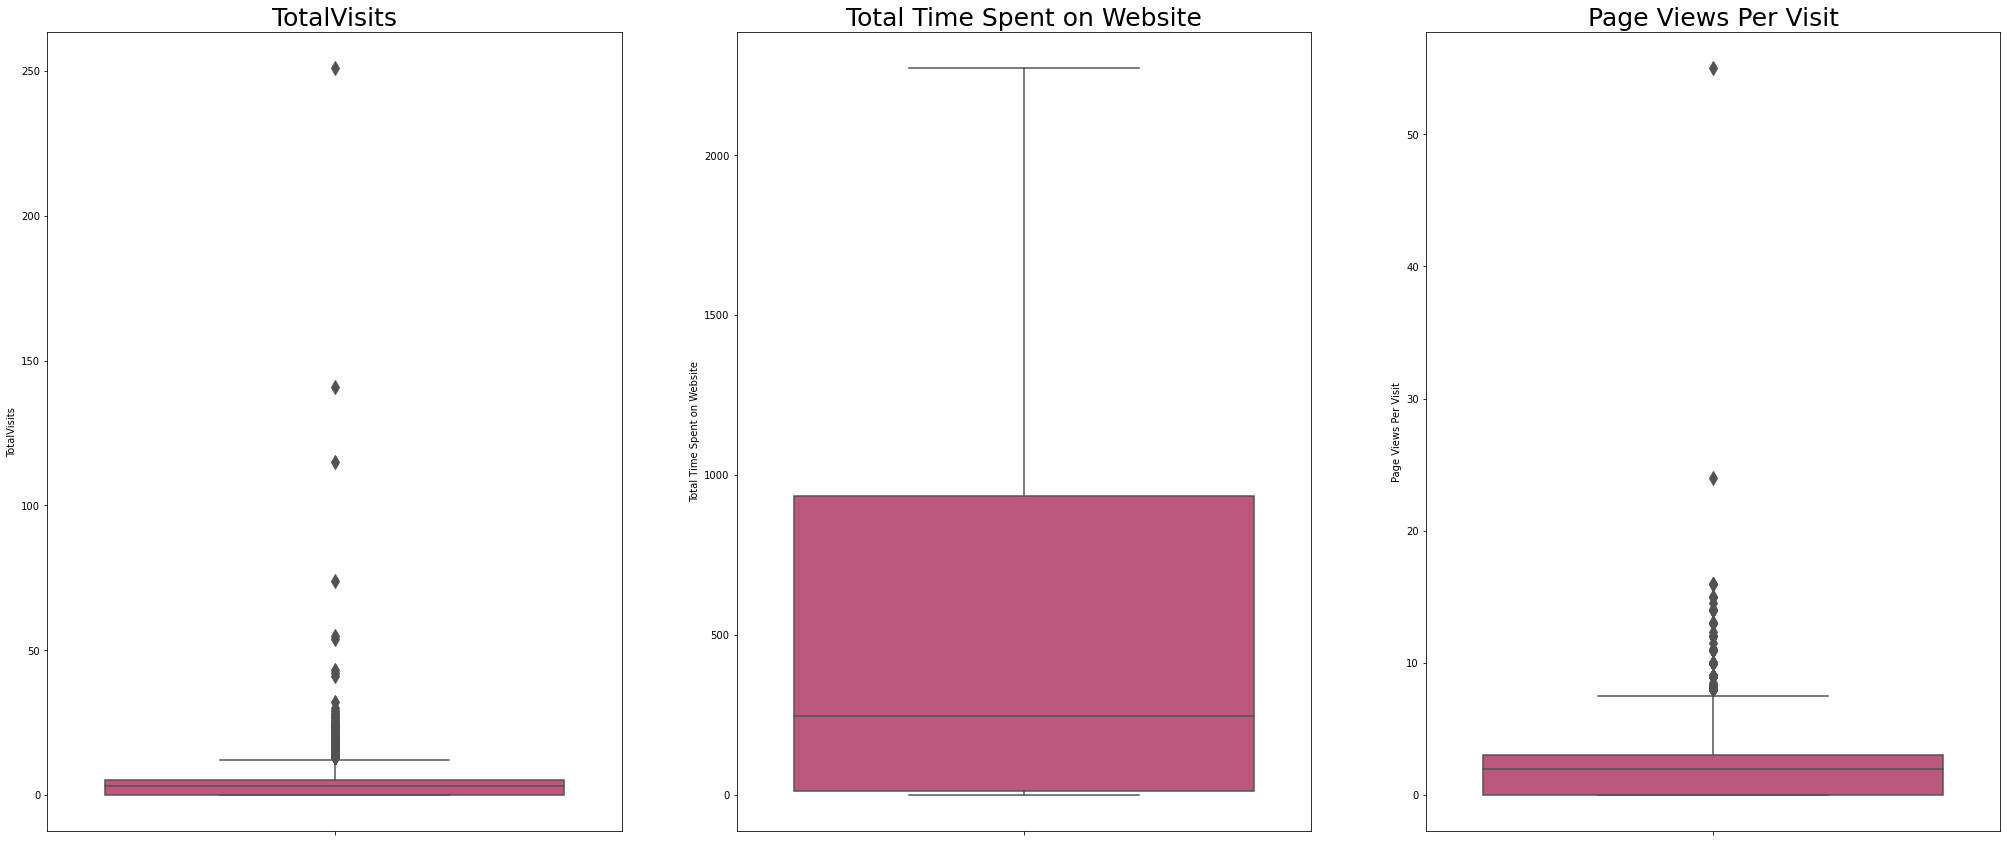

In [38]:
# setting figure size
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col_title[i],fontsize=25)
    sns.boxplot(y=leads[col_title[i]],data=leads,palette='plasma',fliersize=10)

From the above boxplots we can now confirm that we have two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit'). Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will create bins for these two outliers.

#### Creating Bins

In [39]:
# 1. dealing with 'TotalVisits' variable
# As we have range from 0 to 251 we will create buckets as per need

# creating labels
TotalVisits_labels = ['TotalVisits_0', 'TotalVisits_1_2','TotalVisits_3_4','TotalVisits_5_6','TotalVisits_7_8','TotalVisits_9_10',
       'TotalVisits_11_12','TotalVisits_12_15','TotalVisits_above_15']

# creating bins for TotalVisits__labels
leads['TotalVisits'] = pd.cut(leads['TotalVisits'], bins=[-1,0.0,2,4,6,8,10,12,15,251], labels = TotalVisits_labels)


In [40]:
leads['TotalVisits'].value_counts()

TotalVisits_3_4         2426
TotalVisits_0           2326
TotalVisits_1_2         2075
TotalVisits_5_6         1249
TotalVisits_7_8          533
TotalVisits_9_10         278
TotalVisits_11_12        131
TotalVisits_above_15     120
TotalVisits_12_15        102
Name: TotalVisits, dtype: int64

In [41]:
# 2. dealing with 'Page Views Per Visit' variable
# As we have range from 0 to 55 we will create buckets as per need

# creating labels
pvpv_labels=['Page_Views_Per_Visit_0','Page_Views_Per_Visit_1_2','Page_Views_Per_Visit_3_4',
            'Page_Views_Per_Visit_5_6','Page_Views_Per_Visit_7_8','Page_Views_Per_Visit_9_10','Page_Views_Per_Visit_above_10']

# creating bins for 'Page Views Per Visit'
leads['Page Views Per Visit'] = pd.cut(leads['Page Views Per Visit'], bins=[-1,0,2,4,6,8,10,60], labels = pvpv_labels)


In [42]:
leads['Page Views Per Visit'].value_counts()

Page_Views_Per_Visit_1_2         3007
Page_Views_Per_Visit_3_4         2696
Page_Views_Per_Visit_0           2326
Page_Views_Per_Visit_5_6          851
Page_Views_Per_Visit_7_8          237
Page_Views_Per_Visit_9_10          73
Page_Views_Per_Visit_above_10      50
Name: Page Views Per Visit, dtype: int64

In [43]:
# checking data set after creating bins

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


After creating bins we removed the outliers and are now good to go. Before creating the dummy variables let's remove redundant columns/varaibles.

Also from above we know columns : 'Last Activity', 'Tags', 'Last Notable Activity' activity columns came from sales team, thus we will drop these redundant columns.


In [44]:
# dropping redundant column

redundant=['Last Activity', 'Tags', 'Last Notable Activity']

leads=leads.drop(redundant,axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Missing,Unemployed,0,0,0,0,0,0,0


In [45]:
leads.shape

(9240, 17)

Next, we will create dummy variables for mutiple levels of categories

**Creating Dummy Variables**

In [46]:
#Creating a dummy variables for 4 categories and dropping the first level. 

cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']

#creating dummy variables data set
dummy = pd.get_dummies(leads[cat], drop_first=True)

# Adding these dummies to our original dataset
leads = pd.concat([leads,dummy],axis=1)

#dropping the duplicate columns
leads = leads.drop(cat, axis=1)

#viewing the dataset
leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
#checking statistical data
leads.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554,0.528788,0.077706,0.005952,0.000108,0.314827,0.189935,0.124892,0.037338,0.057792,0.043615,0.006169,0.012121,0.105628,0.017208,0.012338,0.091775,0.039610,0.019264,0.090693,0.021970,0.365801,0.054437,0.010823,0.007900,0.004329,0.037771,0.021970,0.001082,0.291126,0.001732,0.022727,0.606061,0.076407,0.224567,0.262554,0.135173,0.057684,0.030087,0.014177,0.011039,0.012987,0.325433,0.291775,0.092100,0.025649,0.007900,0.005411
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559,0.499198,0.267722,0.076926,0.010403,0.464472,0.392271,0.330614,0.189598,0.233363,0.204247,0.078304,0.109433,0.307377,0.130052,0.110394,0.288724,0.195053,0.137459,0.287187,0.146592,0.481680,0.226891,0.103472,0.088537,0.065656,0.190651,0.146592,0.032882,0.454306,0.041579,0.149041,0.488648,0.265662,0.417320,0.440046,0.341927,0.233158,0.170835,0.118229,0.104491,0.113224,0.468562,0.454604,0.289182,0.158095,0.088537,0.073366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [48]:
#checking shape of the data set
leads.shape

(9240, 58)

from above tables we now see that all columns are converted to numerical data

-----------
# 4. Data Preparation

1. Split the dataset into train and test dataset and scaled the datasets.
2. After this, we plot a heatmap to check the correlations among the variables.
3. check heatmap for highly correlated features

#### train_test split

In [49]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [50]:
# putting feature varibales in "X" and target variable in "y" 

y=leads['Converted'] 
X=leads.drop('Converted',1)

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6468, 57)
X_test: (2772, 57)
y_train: (6468,)
y_test: (2772,)


#### Feature Standardization

In [54]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [55]:
# Now, Scaling  'Total Time Spent on Website' variables with standard scaler and fitting on X_train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,-1.609377e-16,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.311843,0.528139,0.079468,0.005102,0.000155,0.320810,0.190167,0.121058,0.036178,0.060297,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.292672,0.001237,0.021027,0.605133,0.077613,0.226809,0.263915,0.133581,0.054731,0.029994,0.013451,0.011905,0.014069,0.329777,0.290507,0.089827,0.024583,0.008658,0.005102
std,0.268799,0.017583,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.463282,0.499246,0.270489,0.071252,0.012434,0.466824,0.392463,0.326219,0.186748,0.238054,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.482162,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.455024,0.035150,0.143484,0.488860,0.267582,0.418800,0.440788,0.340228,0.227472,0.170583,0.115204,0.108466,0.117786,0.470169,0.454031,0.285956,0.154861,0.092652,0.071252
min,0.000000,0.000000,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [56]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 38.54


#### Correlation in the dataset

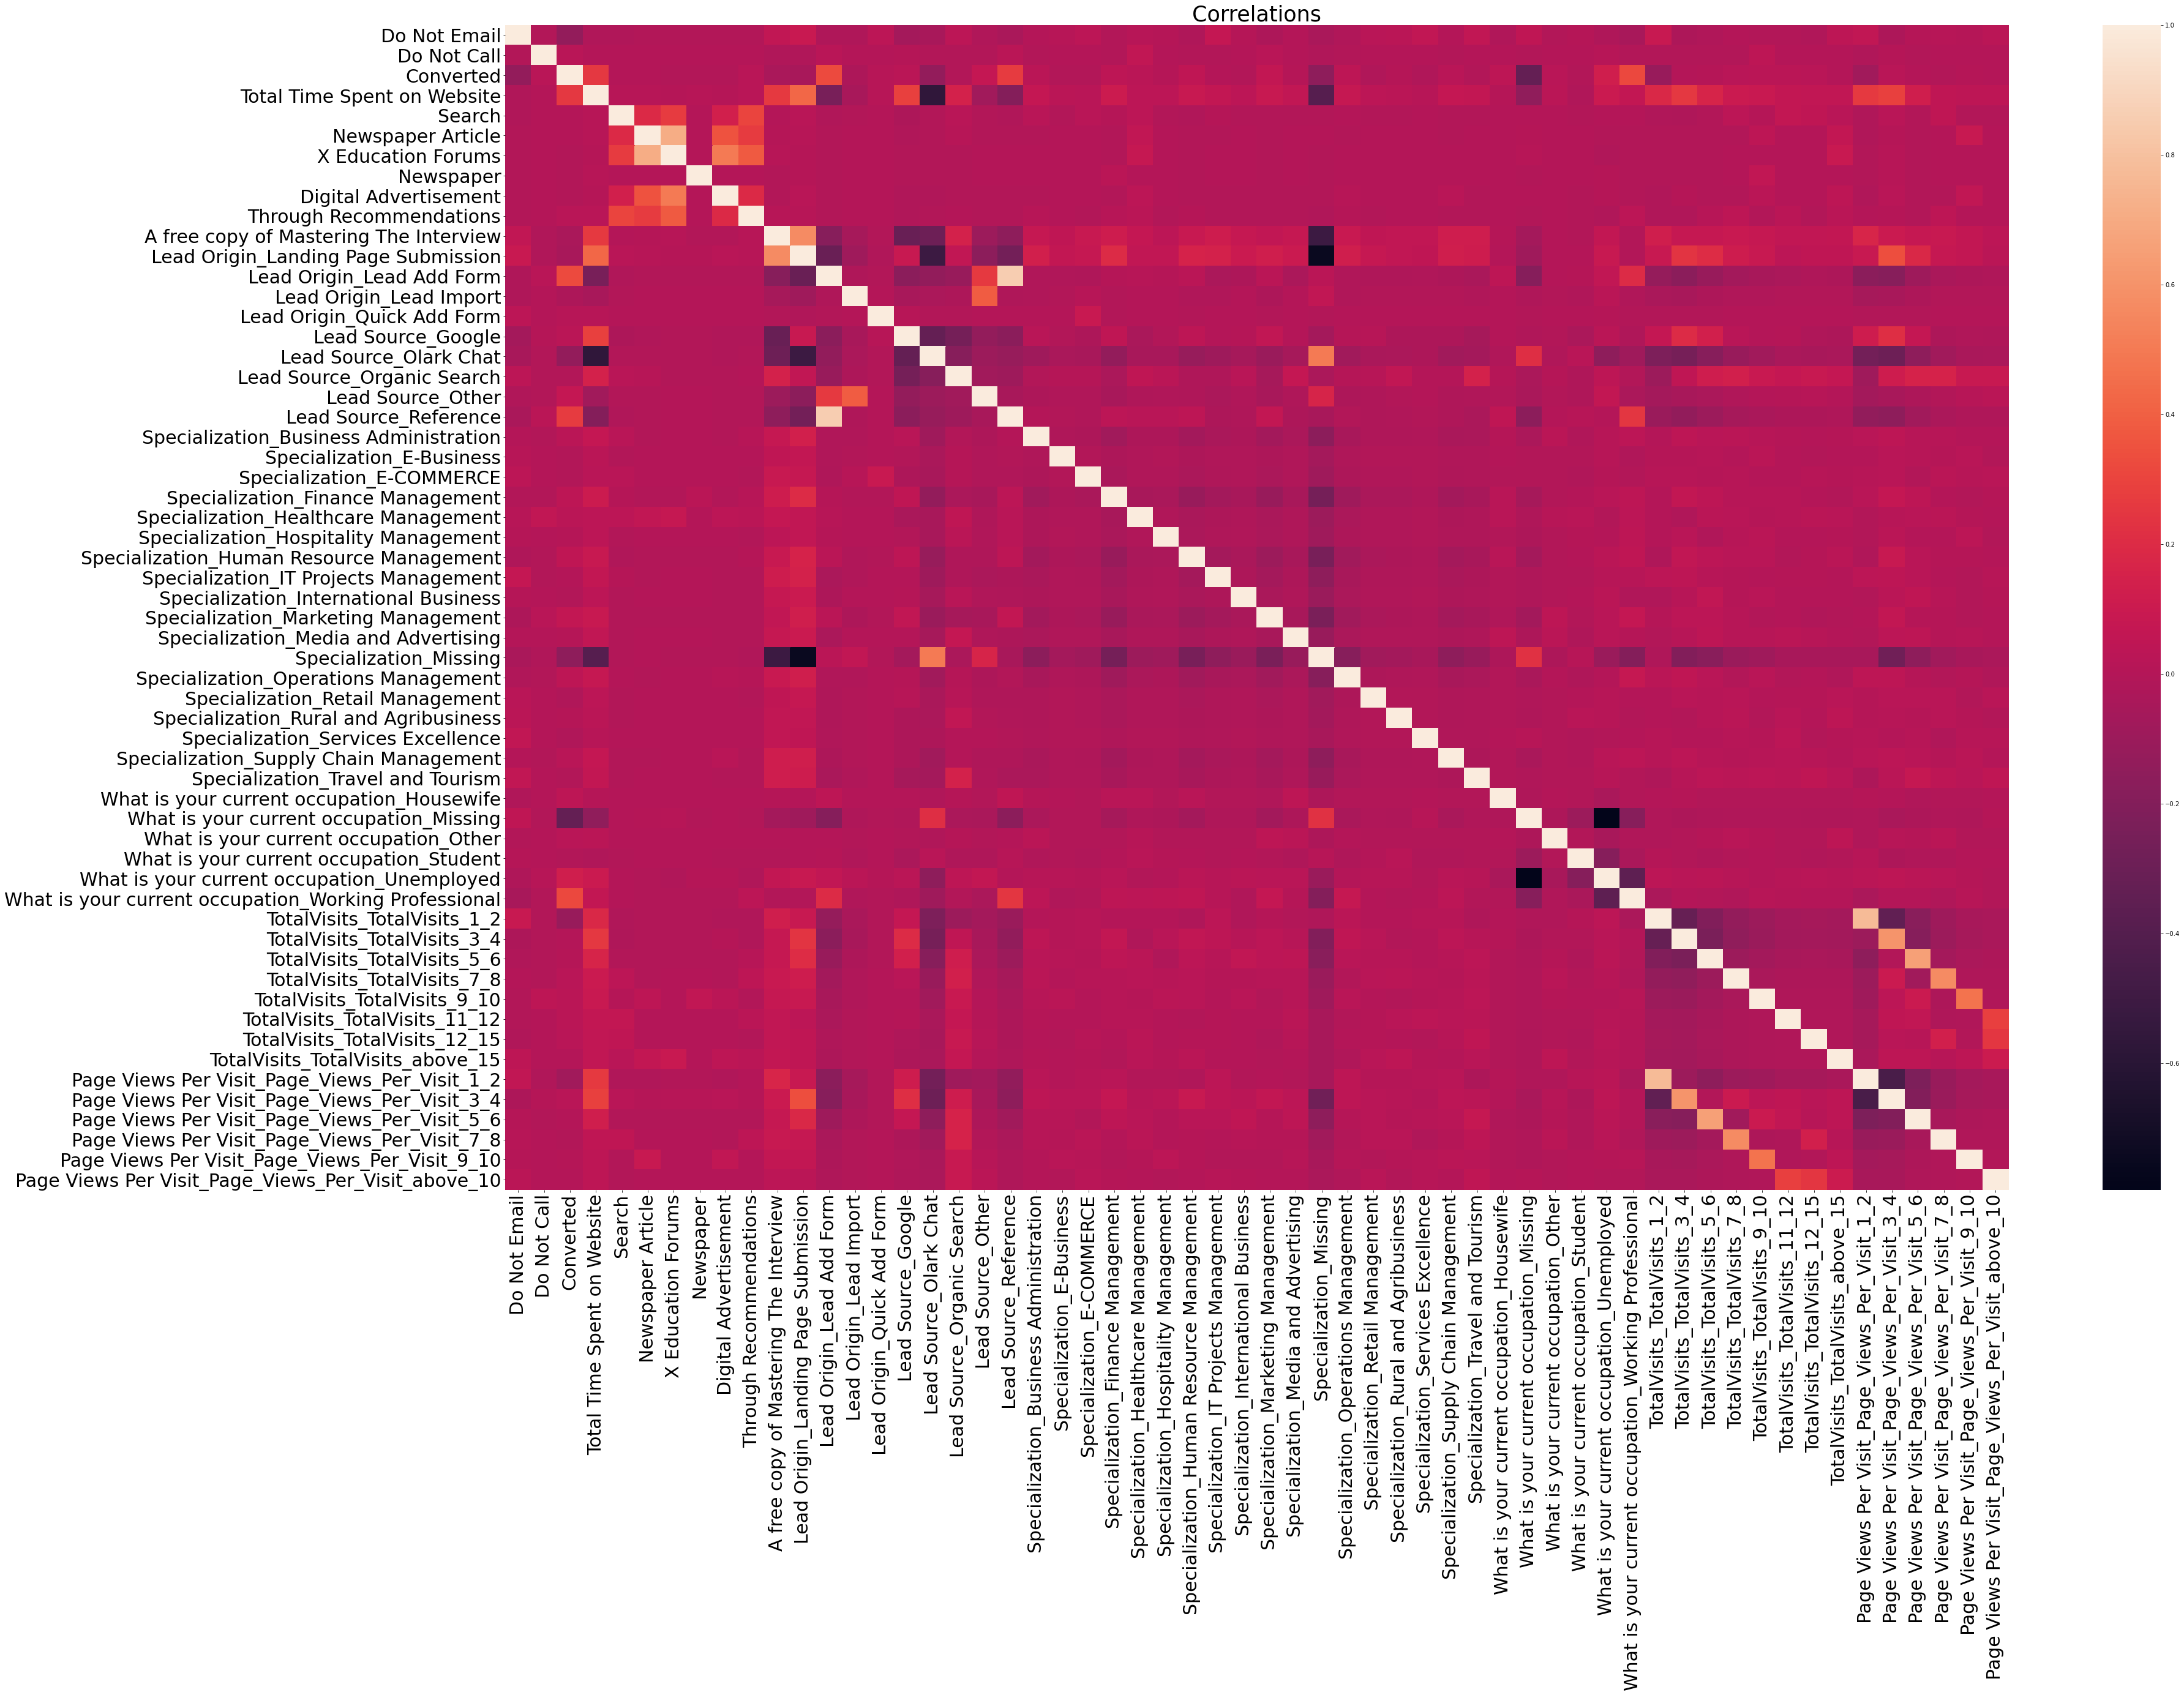

In [57]:
# setting the figure size
plt.figure(figsize=(55,35))

# Plotting a heatmap

sns.heatmap(leads.corr(method='spearman'))
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

Correlation is shown above by heatmap, from above we couldn't find much which features are highly correlated and to drop thus we will now proceed with building our model and based on the p-values and VIFs, we will again check for correlation.

# 5. Building a Model

In [58]:
# importing statmodels library for statistical summary and model creation

import statsmodels.api as sm

We are going to use hybrid model creation using RFE and manual features selection

### feature selection using RFE 

In [59]:
# Importing RFE and logistic regression libraries from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# creating an object

logreg = LogisticRegression()                

In [60]:
# RFE model with 15 variables

rfe = RFE(logreg,15) 

# fitting the model

rfe = rfe.fit(X_train,y_train)   

In [61]:
#listing which all columns are selected(True) by RFE and which all are rejected(False)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 42),
 ('Newspaper Article', False, 11),
 ('X Education Forums', False, 20),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 43),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Other', False, 36),
 ('Lead Source_Reference', False, 3),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 40),
 ('Specialization_Healthcare Management', False, 37),
 ('Specialization_Hospitality

In [62]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other', 'Lead Source_Reference', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'What is your current occupation_Other',
       

In [63]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Hospitality Management,Specialization_Missing,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10
1871,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,0,0,0,1,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,0,1,0,0,0,0,1,0,0,0
8105,0,1.365219,1,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,0


**Model 1**

In [64]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()                                                       #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.5
Date:                Sun, 13 Jun 2021   Deviance:                       5699.1
Time:                        20:16:16   Pearson chi2:                 9.01e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1330      0.136      8.345      0.000       0.867       1.399
Do Not Email                                            -1.2865      0.160     -8.055      0.000      -1.600      -0.973
Total Time Spent on Website                              1.1141      0.039     28.510      0.000       1.037       1.191
Lead Origin_Landing Page Submission                     -0.9087      0.119     -7.607      0.000      -1.143      -0.675
Lead Origin_Lead Add Form                                2.5615      0.188     13.607      0.000       2.193       2.930
Lead Origin_Lead Import                                 -1.5579      0.538     -2.897      0.004      -2.612      -0.504
Specialization_Hospitality Management                   -1.0284      0.327     -3.141      0.002      -1.670      -0.387
Specialization_Missing                                  -0.9752      0.119     -8.164      0.000      -1.209      -0.741
What is your current occupation_Housewife               22.3639   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Missing                 -1.1869      0.083    -14.245      0.000      -1.350      -1.024
What is your current occupation_Working Professional     2.4044      0.185     12.982      0.000       2.041       2.767
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.1833      0.118    -10.005      0.000      -1.415      -0.952
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.9541      0.127     -7.531      0.000      -1.202      -0.706
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.8874      0.154     -5.766      0.000      -1.189      -0.586
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.8564      0.234     -3.655      0.000      -1.316      -0.397
Page Views Per Visit_Page_Views_Per_Visit_9_10          -1.0598      0.373     -2.842      0.004      -1.791      -0.329
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features having insignificant values one by one and create new models until all the features attain significant p-value<0.05 and vif-values < 4.

#### Calculating VIF

In [65]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe[rfe_col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif   # Viewing the dataset

,Features,VIF
2,Lead Origin_Landing Page Submission,4.87
11,Page Views Per Visit_Page_Views_Per_Visit_3_4,3.06
10,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.77
6,Specialization_Missing,2.07
12,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.65
8,What is your current occupation_Missing,1.56
1,Total Time Spent on Website,1.26
13,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.17
3,Lead Origin_Lead Add Form,1.16
9,What is your current occupation_Working Profes...,1.15


**Model 2**

- for this we are dropping 'const','What is your current occupation_Housewife' due to high p-value

In [66]:
# Dropping the most insignificant values 'What is your current occupation_Housewife' and constant

X_train_rfe2 = X_train_1.drop(['const','What is your current occupation_Housewife'],1)

# Creating a new model 2

X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.5
Date:                Sun, 13 Jun 2021   Deviance:                       5709.0
Time:                        20:16:16   Pearson chi2:                 9.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1352      0.136      8.362      0.000       0.869       1.401
Do Not Email                                            -1.2910      0.160     -8.083      0.000      -1.604      -0.978
Total Time Spent on Website                              1.1129      0.039     28.509      0.000       1.036       1.189
Lead Origin_Landing Page Submission                     -0.9055      0.119     -7.585      0.000      -1.139      -0.672
Lead Origin_Lead Add Form                                2.5701      0.188     13.665      0.000       2.201       2.939
Lead Origin_Lead Import                                 -1.5575      0.538     -2.897      0.004      -2.611      -0.504
Specialization_Hospitality Management                   -1.0328      0.327     -3.155      0.002      -1.674      -0.391
Specialization_Missing                                  -0.9786      0.119     -8.196      0.000      -1.213      -0.745
What is your current occupation_Missing                 -1.1897      0.083    -14.283      0.000      -1.353      -1.026
What is your current occupation_Working Professional     2.3987      0.185     12.953      0.000       2.036       2.762
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.1797      0.118     -9.984      0.000      -1.411      -0.948
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.9525      0.127     -7.523      0.000      -1.201      -0.704
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.8905      0.154     -5.787      0.000      -1.192      -0.589
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.8599      0.234     -3.671      0.000      -1.319      -0.401
Page Views Per Visit_Page_Views_Per_Visit_9_10          -1.0632      0.373     -2.852      0.004      -1.794      -0.332
========================================================================================================================
"""

In [67]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.87
10,Page Views Per Visit_Page_Views_Per_Visit_3_4,3.06
9,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.77
6,Specialization_Missing,2.07
11,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.65
7,What is your current occupation_Missing,1.56
1,Total Time Spent on Website,1.26
12,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.17
3,Lead Origin_Lead Add Form,1.16
8,What is your current occupation_Working Profes...,1.15


**Model 3**

- for this we are dropping 'const','Specialization_Missing' as this is has no information.

In [68]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe3 = X_train_2.drop(['const','Specialization_Missing'],1)

# Creating a new model 3

X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2889.1
Date:                Sun, 13 Jun 2021   Deviance:                       5778.2
Time:                        20:16:16   Pearson chi2:                 7.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3026      0.087      3.468      0.001       0.132       0.474
Do Not Email                                            -1.3137      0.160     -8.229      0.000      -1.627      -1.001
Total Time Spent on Website                              1.1258      0.039     28.870      0.000       1.049       1.202
Lead Origin_Landing Page Submission                     -0.2207      0.084     -2.642      0.008      -0.384      -0.057
Lead Origin_Lead Add Form                                2.7839      0.184     15.102      0.000       2.423       3.145
Lead Origin_Lead Import                                 -1.3740      0.527     -2.605      0.009      -2.408      -0.340
Specialization_Hospitality Management                   -0.8809      0.319     -2.761      0.006      -1.506      -0.256
What is your current occupation_Missing                 -1.2688      0.083    -15.371      0.000      -1.431      -1.107
What is your current occupation_Working Professional     2.5462      0.181     14.044      0.000       2.191       2.901
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.0712      0.115     -9.300      0.000      -1.297      -0.845
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.8097      0.123     -6.577      0.000      -1.051      -0.568
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.7444      0.151     -4.923      0.000      -1.041      -0.448
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.6927      0.232     -2.990      0.003      -1.147      -0.239
Page Views Per Visit_Page_Views_Per_Visit_9_10          -0.9893      0.371     -2.665      0.008      -1.717      -0.262
========================================================================================================================
"""

In [69]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.58
9,Page Views Per Visit_Page_Views_Per_Visit_3_4,2.42
8,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.00
10,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.46
6,What is your current occupation_Missing,1.34
1,Total Time Spent on Website,1.17
7,What is your current occupation_Working Profes...,1.15
11,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.12
0,Do Not Email,1.11
3,Lead Origin_Lead Add Form,1.11


In [70]:
# checking all the coefficients
logr2.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.570074
What is your current occupation_Working Professional    2.398664
const                                                   1.135249
Total Time Spent on Website                             1.112920
Page Views Per Visit_Page_Views_Per_Visit_7_8          -0.859904
Page Views Per Visit_Page_Views_Per_Visit_5_6          -0.890471
Lead Origin_Landing Page Submission                    -0.905481
Page Views Per Visit_Page_Views_Per_Visit_3_4          -0.952474
Specialization_Missing                                 -0.978571
Specialization_Hospitality Management                  -1.032759
Page Views Per Visit_Page_Views_Per_Visit_9_10         -1.063223
Page Views Per Visit_Page_Views_Per_Visit_1_2          -1.179674
What is your current occupation_Missing                -1.189745
Do Not Email                                           -1.290958
Lead Origin_Lead Import                                -1.557537
dtype: float64

Now we have good amount of features having significant p-values and VIF-values<4. We will consider model 3 as our final model

### Predicting the train dataset with our final model

In [71]:
#predicting train dataset with final model

y_train_pred=logr3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.333107,1871
6795,0,0.272324,6795
3516,0,0.216616,3516
8105,0,0.705671,8105
3934,0,0.333107,3934


-----
### ROC Curve Plotting
- ROC curve shows the trade off between True postive rate and False positive rate - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate.
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [72]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( actual, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

**ROC CURVE**

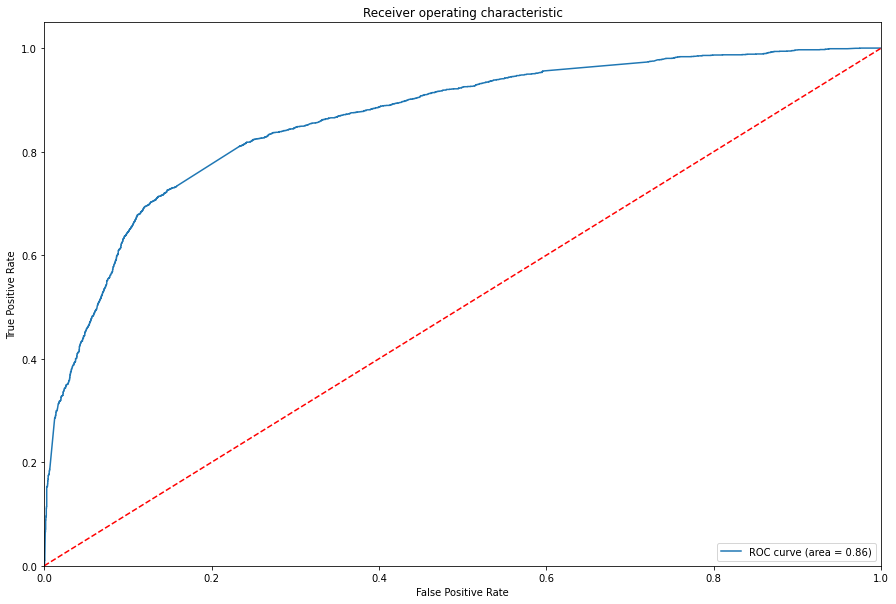

In [73]:
# Calling the roc curve function for plotting

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [74]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.333107,1871,1,1,1,1,0,0,0,0,0,0
6795,0,0.272324,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.216616,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.705671,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.333107,3934,1,1,1,1,0,0,0,0,0,0


**Accurary, Sensitivity, Specificity** 

In [75]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.526129    0.982157     0.245127
0.2          0.2  0.699289    0.893350     0.579710
0.3          0.3  0.775201    0.824818     0.744628
0.4          0.4  0.806741    0.705191     0.869315
0.5          0.5  0.803494    0.650852     0.897551
0.6          0.6  0.787879    0.578670     0.916792
0.7          0.7  0.766698    0.483374     0.941279
0.8          0.8  0.740878    0.371452     0.968516
0.9          0.9  0.684292    0.181671     0.994003


**PLotting Accuracy, Sensitivity and Specificity**

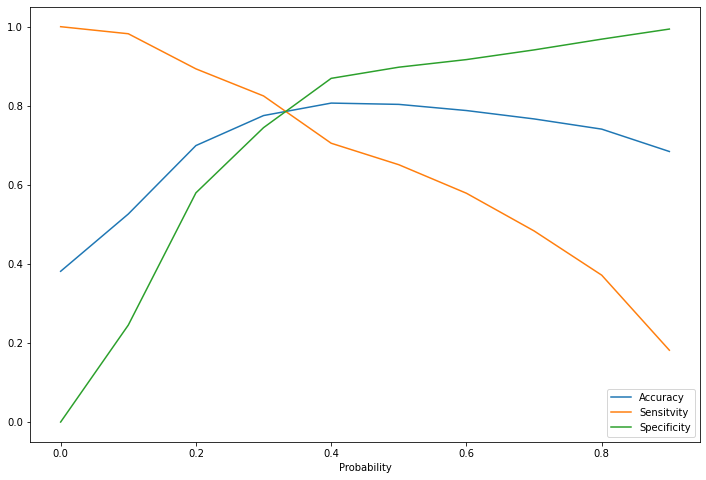

In [76]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [77]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.333107,1871,1,1,1,1,0,0,0,0,0,0,1
6795,0,0.272324,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.216616,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.705671,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.333107,3934,1,1,1,1,0,0,0,0,0,0,1


In [78]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[2980, 1022],
       [ 432, 2034]], dtype=int64)

In [79]:
#Sensitivity score
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_train)  
print('Specificity:',Specificity_train) 

Sensitivity: 82.48
Specificity: 74.46


In [80]:
#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train) 
print('Recall:',Recall_train)     

Precision: 66.56
Recall: 82.48


In [81]:
# Checking accuracy for train dataset 
from sklearn import metrics

Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 77.52


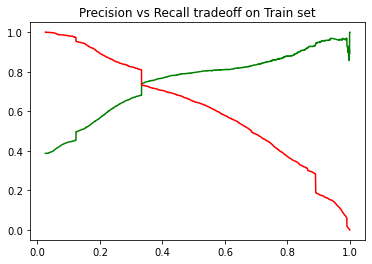

In [82]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

------
# Prediction on the test dataset
### Scaling the test dataset

In [83]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [84]:
# Predicting the test dataset with our final model

test_cols=X_train_3.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr3.predict(X_test_final)      # Predicting the final test set

In [85]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.360528,4269
2376,1,0.889902,2376
7766,1,0.773658,7766
9199,0,0.333107,9199
4359,1,0.889902,4359


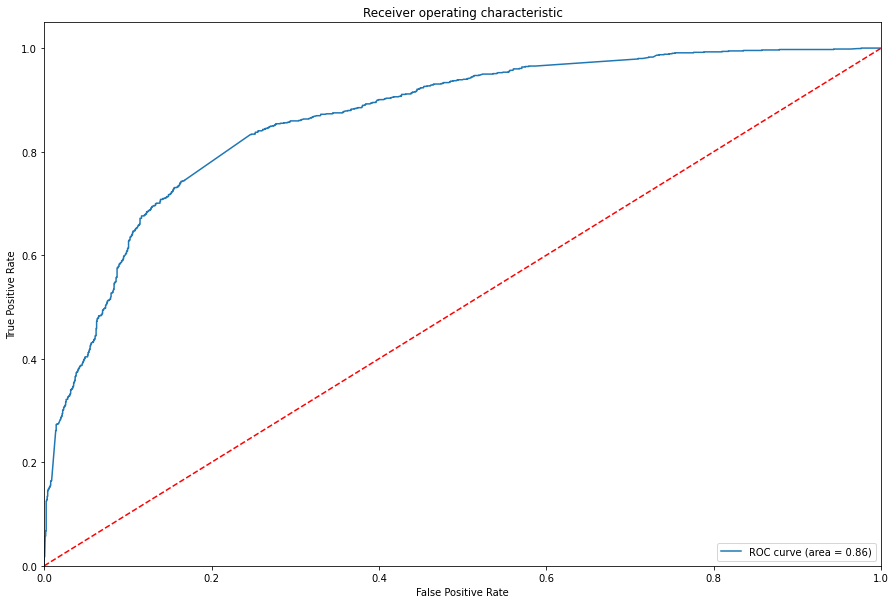

In [86]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

## Model Evaluation

In [87]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.360528,4269,1
2376,1,0.889902,2376,1
7766,1,0.773658,7766,1
9199,0,0.333107,9199,1
4359,1,0.889902,4359,1


In [88]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1228,  449],
       [ 169,  926]], dtype=int64)

In [89]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test) 

Sensitivity: 84.57
Specificity: 73.23


In [90]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test) 
print('Recall:',Recall_test)     

Precision: 67.35
Recall: 84.57


In [91]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 77.71


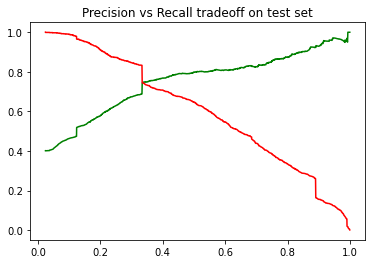

In [92]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [93]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  74.97975708502025


### Metrics Comparison between Train data set and Test data set

In [94]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test)
print('Precision:',Precision_test) 
print('Recall:',Recall_test)
print('Accuracy:',Accuracy_test)

Train Data Set metrics:

Sensitivity: 82.48
Specificity: 74.46
Precision: 66.56
Recall: 82.48
Accuracy: 77.52

Test Data Set metrics:

Sensitivity: 84.57
Specificity: 73.23
Precision: 67.35
Recall: 84.57
Accuracy: 77.71


### Assigning a Lead Score to the Predicted values based on Lead Number 

In [95]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_test_pred_final['Lead Number']=leads.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.360528,4269,1,0,36
2376,1,0.889902,2376,1,0,89
7766,1,0.773658,7766,1,0,77
9199,0,0.333107,9199,1,0,33
4359,1,0.889902,4359,1,0,89
9186,1,0.401649,9186,1,0,40
1631,1,0.605263,1631,1,0,61
8963,1,0.229116,8963,0,0,23
8007,0,0.092394,8007,0,0,9
5324,1,0.198619,5324,0,0,20


## Conclusion
### Valuable Insights -

- The Sensitivity and Specificity, Accuracy, Precision and Recall score we got from test set are almost accurate.
- We have high recall score than precision score which is a sign of good model.
- In business terms, this model has an ability to adjust with the company’s requirements in coming future.
- This concludes that the model is in stable state.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - Lead Origin_Lead Add Form
    - Total Time Spent on Website
    - What is your current occupation_Working Professional